# Connecting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Connecting kaggle

In [2]:
# Install kaggle
!pip install -q kaggle

In [3]:
# upload kaggle.json file which we downloaded
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arbazkhancs","key":"140450ae4ad01edb47d18c912d681ad3"}'}

In [4]:
# Create A Kaggle Folder
! mkdir ~/.kaggle

In [5]:
# Copy the kaggle.json file to the above folder
! cp kaggle.json ~/.kaggle/

In [6]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# to list all kaggle datasets
! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17           5908         93  1.0              
tarunrm09/climate-change-indicators                          Climate change Indicators                           34KB  2024-02-22 08:53:54           2774         67  1.0              
nelgiriyewithana/apple-quality                               Apple Quality                                      170KB  2024-01-11 14:31:07          24947        531  1.0              
devi5723/e-commerce-cosmetics-dataset                        E-commerce Cosmetic

# Downloading the Dataset

In [8]:
! kaggle datasets download -d adityajn105/flickr8k

 98% 1.02G/1.04G [00:04<00:00, 224MB/s]
100% 1.04G/1.04G [00:04<00:00, 226MB/s]


In [ ]:
# unzip the downloaded file
! unzip flickr8k.zip

# Importing Neccessary Librarys to proccess the images

In [10]:
from os import listdir
from pickle import dump
from tqdm import tqdm

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model

# Creating Extracting Feature Function

In [17]:
def Extract_features(directory):
  # load the model
  model = VGG16()

  # re-structure the model
  model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

  # summarize
  print(model.summary())

  # extract features
  features = dict()
  for _file in tqdm(listdir(directory)):
    # load an image from file in PIL format
    filename = directory + '/' + _file
    image = load_img(filename, target_size=(224, 224))

    # re-structure the image for the model input shape
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # prepare the image for the VGG16 model
    preprocess_image = preprocess_input(image)

    # get the feature
    feature = model.predict(preprocess_image, verbose=0)

    # store the feature according to it's id
    image_id = _file.split(".")[0]
    features[image_id] = feature

  return features

# Intution behind loading the images

In [18]:
# load PIL image
image1 = load_img('Images/1000268201_693b08cb0e.jpg', target_size=(224, 224))

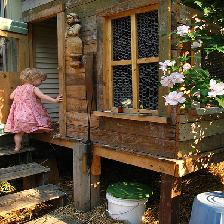

In [19]:
image1

In [20]:
# converting the PIL to array
image1 = img_to_array(image1)

In [21]:
# shape of the image with RGB
image1.shape

(224, 224, 3)

# Extracting features

In [22]:
directory = 'Images'
features = Extract_features(directory)
print(features['1000268201_693b08cb0e'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

100%|██████████| 8091/8091 [12:40<00:00, 10.64it/s]

[[2.507475 0.       0.       ... 0.       0.       0.      ]]


# Saving the features

In [23]:
dump(features, open("/content/drive/MyDrive/Colab Notebooks/Image-Captioning Project/Preprocessing/features.pkl", 'wb'))